# Estrategia

La estrategia actual de la empresa se divide en 2:

- Por una parte, el cliente puede seleccionar un envío "On Demand", y la empresa se compromete con un envío menor a 90 min.
- Un envío que no es "On Demand" , el cliente debe elegir un rango de horario de 1 hora en la cual puede llegar el pedido.

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [89]:
df = pd.read_csv('data/consolidado.csv')

In [111]:
time = pd.DataFrame(df.entrega.str.split(':', expand=True))
time.columns = ('hora','minuto','segundos')

df['hora'] = pd.to_numeric(time['hora'])

In [90]:
df['tiempo'].isna().value_counts()

False    6543
Name: tiempo, dtype: int64

In [91]:
df.rename(columns= {'id_entrega':'on_demand'},inplace=True)

In [92]:
df['promesa_h'] = pd.to_datetime(df['promesa'], format='%H:%M:%S')
df['entrega_h'] = pd.to_datetime(df['entrega'], format='%H:%M:%S')

In [93]:
df['diferencia'] = (df['promesa_h']- df['entrega_h']).dt.total_seconds()/60

In [94]:
df = df.query("abs(diferencia)<1000")

In [95]:
df['tiempo'] = pd.to_numeric(df.tiempo.str.replace('.',''))/1000000

In [96]:
df.drop( df[ df['tiempo'] < 25 ].index , inplace=True)

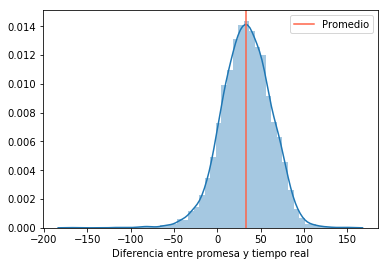

In [109]:
sns.distplot(df['diferencia'])
plt.axvline(df['diferencia'].mean(), color="tomato", label='Promedio')
plt.xlabel('Diferencia entre promesa y tiempo real', )
plt.legend()
plt.show()


In [98]:
df['promesa_cumplida'] = np.where(df['diferencia']<0 , 0, 1)

In [99]:
df['promesa_cumplida'].value_counts()

1    5215
0     642
Name: promesa_cumplida, dtype: int64

In [100]:
df['promesa_cumplida'].value_counts(normalize = True)

1    0.890388
0    0.109612
Name: promesa_cumplida, dtype: float64

La empresa no cumple la promesa en un 11% de los pedidos

In [101]:
(df.groupby('on_demand')['promesa_cumplida'].value_counts(normalize = True))

on_demand  promesa_cumplida
0          1                   0.812218
           0                   0.187782
1          1                   0.946167
           0                   0.053833
Name: promesa_cumplida, dtype: float64

Siendo más precisos, hay más propensión a incumplir la promesa cuando **no es on demand.**

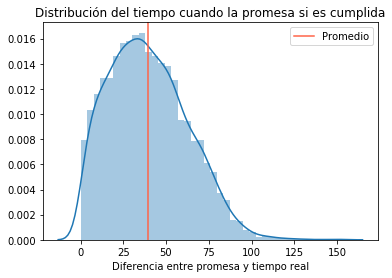

In [108]:
sns.distplot(df[df['promesa_cumplida'] == 1].query("diferencia<1200").diferencia)
plt.axvline(df[df['promesa_cumplida'] == 1].query("diferencia<1200").diferencia.mean(), color="tomato",label='Promedio')
plt.title('Distribución del tiempo cuando la promesa si es cumplida')
plt.xlabel('Diferencia entre promesa y tiempo real', )
plt.legend()
plt.show()

# Incumplimiento promesa por dia/hora

In [142]:
df.groupby('dia')['promesa_cumplida'].mean()

dia
0    0.910112
1    0.884091
2    0.894246
3    0.894221
4    0.877193
5    0.899420
6    0.876984
Name: promesa_cumplida, dtype: float64

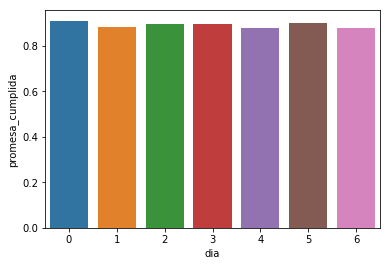

In [141]:
sns.barplot(data= df.groupby('dia')['promesa_cumplida'].mean().reset_index(), x='dia', y='promesa_cumplida',)

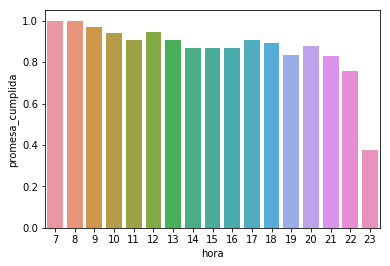

In [143]:
sns.barplot(data= df.groupby('hora')['promesa_cumplida'].mean().reset_index(), x='hora', y='promesa_cumplida',)

Text(0.5, 69.0, 'Día')

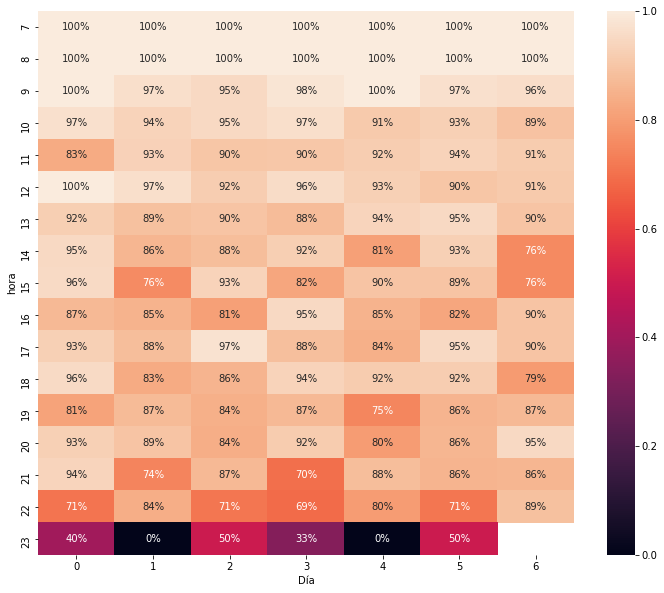

In [126]:
plt.figure(figsize=(12, 10))


sns.heatmap(df.pivot_table(values='promesa_cumplida', index='hora', columns='dia'), annot=True, fmt=".0%")
plt.xlabel('Día')

De forma exploratoria, notamos que la mayor parte de los incumplimientos de promesas, ocurren en horarios posteriores a las 20 PM, y que son relativamente estables por día